# Práctico 2 - Pasos fronterizos

In [16]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Lectura de JSON

In [18]:
tabla_2 = pd.read_json(BASE_DIR + "/input/pasos.json")
tabla_2.head(2)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego


### Listamos las provincias (para ver sus valores)

In [19]:
lista = tabla_2.province.unique() 
for p in sorted(lista):
    print(p)

AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ
Buenos Aires
Catamarca
Chaco
Chubut
Cordoba
Corrientes
Córdoba
Entre Rios
Formosa
Jujuy
La Rioja
Mendoza
Misiones
NEUQUEN
Neuquen
Rio Negro
Salta
San Juan
San Luis
Santa Cruz
Santa Fe
Santiago del Estero
Tierra del Fuego
Tucuman


### Corrección de datos
Corregimos Neuquen (duplicado), cambiamos el nombre del aeropuerto por su provicina y corregimos los 2 valores diferentes para Córdoba.

In [20]:
tabla_2[tabla_2.province == 'NEUQUEN'] = 'Neuquen'
tabla_2[tabla_2.province == 'Cordoba'] = 'Córdoba'
tabla_2[tabla_2.province == 'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ'] = "Santa Cruz"

In [21]:
#Control de los datos
tabla_2['province'].value_counts()

Buenos Aires           48
Misiones               38
Santa Cruz             21
Corrientes             15
Chubut                 15
Mendoza                14
Entre Rios             13
Neuquen                11
Formosa                11
Santa Fe               11
Tierra del Fuego        9
Jujuy                   8
Rio Negro               8
San Juan                5
Santiago del Estero     4
Salta                   4
Córdoba                 4
Chaco                   3
La Rioja                3
Catamarca               3
Tucuman                 2
San Luis                2
Name: province, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

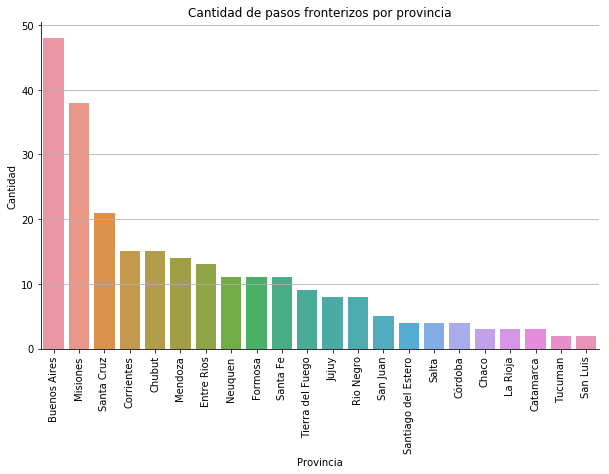

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=tabla_2, x='province', order = tabla_2.province.value_counts().index)
ax.grid(axis='y')
plt.title("Cantidad de pasos fronterizos por provincia")
plt.ylabel("Cantidad")
plt.xlabel("Provincia")
sns.despine()
plt.xticks(rotation=90)